In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(market_data_df)

# Convert the scaled data back into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)

# Display the first 10 rows of the scaled DataFrame
print(scaled_df.head(10))

                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

In [26]:
# Create a DataFrame with the scaled data
scaled_df =pd.DataFrame(scaled_data, columns=market_data_df.columns)

# Copy the crypto names from the original data
scaled_df['coin_id'] = market_data_df.index

# Set the coin_id column as index
scaled_df.set_index('coin_id',inplace=True)

# Display sample data
print(scaled_df.head(10))

                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

### Find the Best Value for k Using the Original Scaled DataFrame.

In [27]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1,12))

# Create an empty list to store the inertia values
inertia=[] 

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(scaled_df)
    inertia.append(kmeans_model.inertia_)
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

     k     inertia
0    1  287.000000
1    2  212.123342
2    3  170.193571
3    4   79.022435
4    5   71.097914
5    6   66.108827
6    7   54.488123
7    8   43.224693
8    9   32.860884
9   10   28.404885
10  11   24.116198


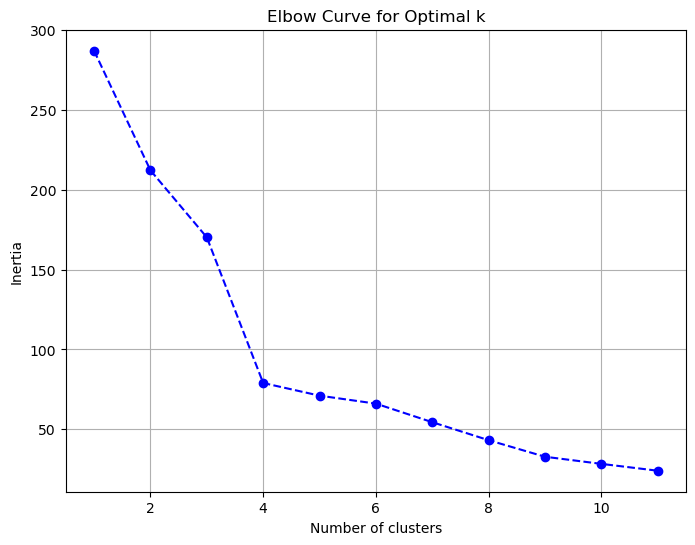

In [28]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o',linestyle='--', color='b')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal k')
plt.grid(True)
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4


### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [29]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4 , random_state=42)

In [30]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [31]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans_model.predict(scaled_df)

# View the resulting array of cluster values.
print(predicted_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [32]:
# Create a copy of the DataFrame
market_data_df_copy = market_data_df.copy()


In [34]:
# Add a new column to the DataFrame with the predicted clusters
market_data_df['predicted_cluster']= predicted_clusters

# Display sample data
print(market_data_df.head(10))

                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                              1.08388                     7.60278   
ethereum                             0.22392                    10.38134   
tether                              -0.21173                     0.04935   
ripple                              -0.37819                    -0.60926   
bitcoin-cash                         2.90585                    17.09717   
binancecoin                          2.10423                    12.85511   
chainlink                           -0.23935                    20.69459   
cardano                              0.00322                    13.99302   
litecoin                            -0.06341                     6.60221   
bitcoin-cash-sv                      0.92530                     3.29641   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

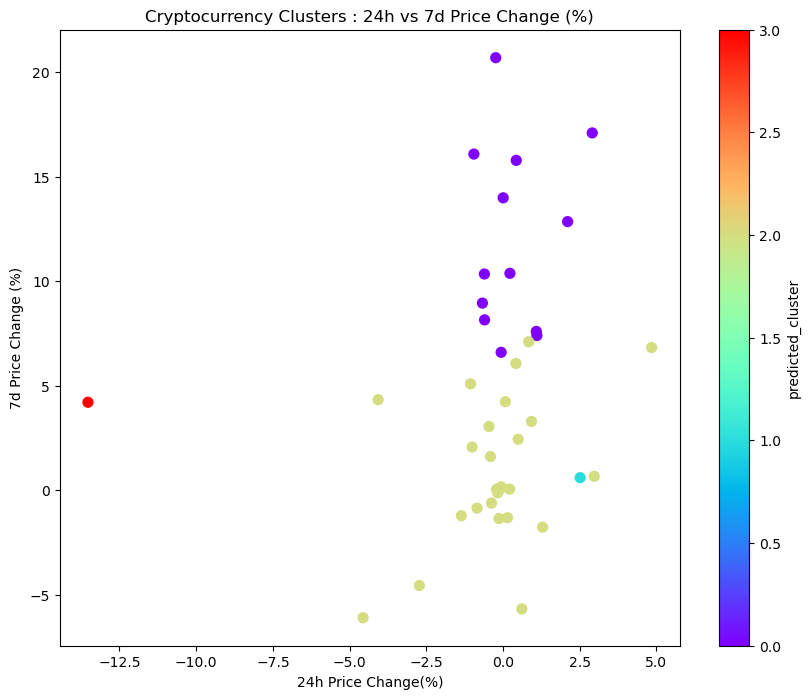

In [39]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="predicted_cluster", colormap="rainbow", figsize=(10, 8), s=50, title='Cryptocurrency Clusters : 24h vs 7d Price Change (%)',xlabel='24h Price Change(%)',ylabel='7d Price Change (%)')
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [40]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [41]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=pca_data, columns=["PC1", "PC2", "PC3"], index=scaled_df.index)
# View the first five rows of the DataFrame. 
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [42]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
for i, variance in enumerate(explained_variance):
    print(f"Explained Variance for PC{i+1}: {variance:.4f}")
    cumulative_explained_variance = explained_variance.cumsum()
for i, cumulative_variance in enumerate(cumulative_explained_variance):
    print(f"Cumulative Explained Variance for PC{i+1}: {cumulative_variance:.4f}")

Explained Variance for PC1: 0.3720
Explained Variance for PC2: 0.3470
Explained Variance for PC3: 0.1760
Cumulative Explained Variance for PC1: 0.3720
Cumulative Explained Variance for PC2: 0.7190
Cumulative Explained Variance for PC3: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 
Explained Variance for PC1: 0.3720
Explained Variance for PC2: 0.3470
Explained Variance for PC3: 0.1760
To calculate the total explained variance, simply add these values together:

Total Explained Variance
=
PC1
+
PC2
+
PC3
Total Explained Variance=PC1+PC2+PC3
Total Explained Variance
=
0.3720
+
0.3470
+
0.1760
=
0.8950
Total Explained Variance=0.3720+0.3470+0.1760=0.8950
Interpretation:

The three principal components together explain 89.5% of the total variance in the dataset.
This means that by reducing the data to 3 dimensions using PCA, you retain 89.5% of the original information (variance) in the data.
Key Points:

The remaining 10.5% of the variance is not captured by the first three principal components.
If you need to capture more variance, you could consider adding more principal components (e.g., n_components=4 or higher), but this would increase the dimensionality of the data.
Next Steps:

If 89.5% explained variance is sufficient for your analysis or visualization, you can proceed with the 3 principal components.
If you need to capture more variance, you can increase the number of principal components and recalculate the explained variance.
For example, if you add a fourth principal component and it explains an additional 5% of the variance, the cumulative explained variance would increase to 94.5%.

In [43]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(data=pca_data, columns=["PC1", "PC2", "PC3"], index=scaled_df.index)


# Copy the crypto names from the original data
pca_df['coin_id'] = market_data_df.index

# Set the coinid column as index
pca_df.set_index('coin_id',inplace=True)

# Display sample data
print(pca_df.head(10))

                      PC1       PC2       PC3
coin_id                                      
bitcoin         -0.600667  0.842760  0.461595
ethereum        -0.458261  0.458466  0.952877
tether          -0.433070 -0.168126 -0.641752
ripple          -0.471835 -0.222660 -0.479053
bitcoin-cash    -1.157800  2.041209  1.859715
binancecoin     -0.516534  1.388377  0.804071
chainlink       -0.450711  0.517699  2.846143
cardano         -0.345600  0.729439  1.478013
litecoin        -0.649468  0.432165  0.600303
bitcoin-cash-sv -0.759014 -0.201200 -0.217653


### Find the Best Value for k Using the PCA Data

In [44]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1,12))

# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(pca_df)
    inertia.append(kmeans_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

     k     inertia
0    1  256.874086
1    2  182.339530
2    3  140.431833
3    4   49.665497
4    5   42.051901
5    6   31.749005
6    7   28.031869
7    8   19.451747
8    9   13.814082
9   10   10.630648
10  11   10.120243


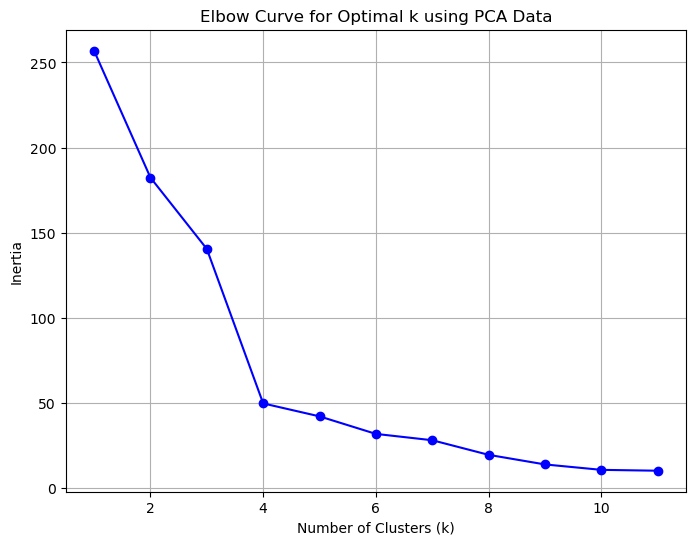

In [45]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal k using PCA Data')
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [46]:
# Initialize the K-Means model using the best value for k
best_k =4 
kmeans_model = KMeans(n_clusters=best_k, random_state=42)

In [47]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_df)

KMeans(n_clusters=4, random_state=42)

In [48]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = kmeans_model.predict(pca_df)

# Print the resulting array of cluster values.
print(predicted_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [49]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['predicted_cluster'] = predicted_clusters

# Display sample data
print(pca_df_copy.head(10))

                      PC1       PC2       PC3  predicted_cluster
coin_id                                                         
bitcoin         -0.600667  0.842760  0.461595                  0
ethereum        -0.458261  0.458466  0.952877                  0
tether          -0.433070 -0.168126 -0.641752                  2
ripple          -0.471835 -0.222660 -0.479053                  2
bitcoin-cash    -1.157800  2.041209  1.859715                  0
binancecoin     -0.516534  1.388377  0.804071                  0
chainlink       -0.450711  0.517699  2.846143                  0
cardano         -0.345600  0.729439  1.478013                  0
litecoin        -0.649468  0.432165  0.600303                  0
bitcoin-cash-sv -0.759014 -0.201200 -0.217653                  2


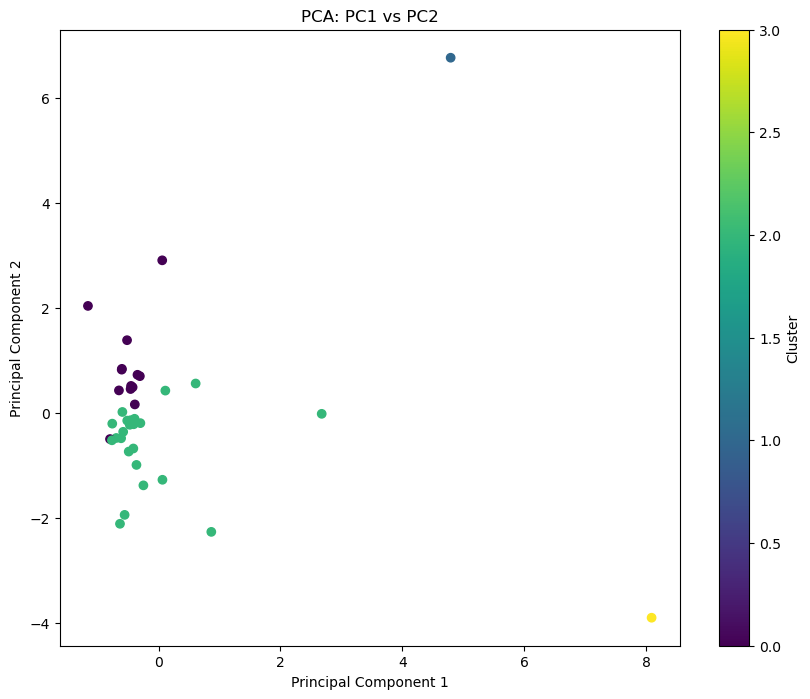

In [50]:
# Create a scatter plot by setting `x="PCA1"` and `y="PCA2"`. 
plt.figure(figsize=(10, 8))
plt.scatter(pca_df_copy['PC1'], pca_df_copy['PC2'], c=pca_df_copy['predicted_cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: PC1 vs PC2')
plt.colorbar(label='Cluster')
plt.show()

### Determine the Weights of Each Feature on each Principal Component

In [52]:
# Use the columns from the original scaled DataFrame as the index.
pca_df = pd.DataFrame(data=pca_data, columns=["PC1", "PC2", "PC3"], index=scaled_df.index)
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
PC1: Bitcoin Cash has the strongest negative influence.
PC2: Bitcoin Cash has the strongest positive influence, followed by Bitcoin.
PC3: Bitcoin Cash has the strongest positive influence, followed by Ethereum.
    